In [26]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt

In [33]:
path="./anhdemo/1.png"
img = cv.imread(path,0)
img = cv.resize(img, (300, 300))
se = [[0,1,0],
          [1,1,1],
          [0,1,0]]

x, y = img.shape
print(x, y)

300 300


In [40]:
def calculate_template_space(temp_side_length):
        return int(temp_side_length/2)
def erosion(image, template_side_length, template):
    new_image = np.zeros(image.shape, image.dtype)
    template_space = calculate_template_space(template_side_length)
    half_template = int((template_side_length - 1) / 2)

    for x in range(template_space, new_image.shape[1] - template_space - 1):
        for y in range(template_space, new_image.shape[0] - template_space - 1):
            la = x - half_template
            lb = y - half_template
            ra = la + template_side_length
            rb = lb + template_side_length
            sub = np.where(template, image[lb:rb, la:ra], 256)
            new_image[y, x] = int(sub.min())
    return new_image

In [41]:
filter_size = 9
temp = np.ones((filter_size, filter_size))
img_erosion = erosion(img, filter_size, temp)

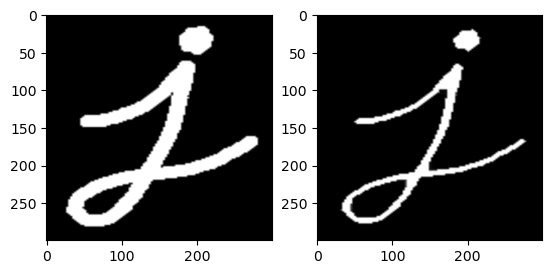

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')  
plt.subplot(1, 2, 2)
plt.imshow(img_erosion, cmap='gray')  

In [43]:
def dilation(image, template_side_length, template):
    new_image = np.zeros(image.shape, image.dtype)
    template_space = calculate_template_space(template_side_length)
    half_template = int((template_side_length - 1) / 2)

    for x in range(template_space, new_image.shape[1] - template_space - 1):
        for y in range(template_space, new_image.shape[0] - template_space - 1):
            la = x - half_template
            lb = y - half_template
            ra = la + template_side_length
            rb = lb + template_side_length
            #print(x, y, la, lb, ra, rb)
            sub = np.where(template, image[lb:rb, la:ra], 256)
            new_image[y, x] = int(sub.max())
    return new_image

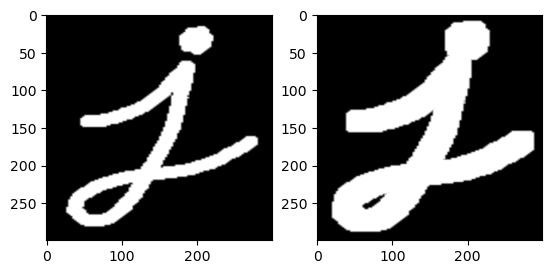

In [45]:
filter_size = 15
temp = np.ones((filter_size, filter_size))
di = dilation(img, filter_size, temp)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')  
plt.subplot(1, 2, 2)
plt.imshow(di, cmap='gray')  